#Predicting Overall Rating based on Players Different Stats and Comparing them with their Actual Overall rating


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data PreProcessing

In [25]:
df = pd.read_csv('/content/WMF(1).csv')
df

,Unnamed: 0,ID,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Offensive Awareness,...,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating,Price
0,0,1.665200e+04,LMF,R. Shirasaki,Shimizu S-Pulse,Japan,181,70,29,69,...,52,58,55,40,40,40,40,40,80,3.7
1,1,1.686200e+04,LMF,M. Matsumoto,Jubilo Iwata,Japan,175,69,27,72,...,56,58,53,40,40,40,40,40,80,3.6
2,2,3.843900e+04,LMF,I. Perišić,Tottenham WB,Croatia,186,80,33,73,...,57,62,65,40,40,40,40,40,89,82.0
3,3,4.020400e+04,LMF,D. Lazović,Verona GB,Serbia,181,66,32,70,...,51,57,53,40,40,40,40,40,85,14.0
4,4,4.034100e+04,LMF,M. Barthelmé,En Avant Guingamp,France,172,73,34,69,...,53,54,54,40,40,40,40,40,80,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,275,1.055880e+14,RMF,J. Cuadrado,Piemonte BN,Colombia,179,71,34,73,...,66,69,64,40,40,40,40,40,93,0.0
527,276,1.055900e+14,RMF,J. Corona,Sevilla Nervión BR,Mexico,173,66,29,74,...,61,60,69,40,40,40,40,40,91,0.0
528,277,1.055930e+14,RMF,J. Maddison,Tottenham WB,England,175,73,26,80,...,52,55,61,40,40,40,40,40,93,0.0
529,278,1.066550e+14,RMF,T. Kubo,Vasco Gipuzkoa AB,Japan,173,67,21,79,...,51,59,65,40,40,40,40,40,94,0.0


As we can see few columns are just **Arbitrary Values** which does not have any effect on Player stats.


1.   Unnamed: 0
2.   Player Name
3.   Team Name
4.   Nationality
5.   ID
6.   Position
7.   Price

So Dropping thes columns will not affect data set.





In [26]:

df = df.drop(['Unnamed: 0','Player Name', 'Team Name','Nationality','ID','Position','Price'], axis = 1)


In [27]:
df

,Height,Weight,Age,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,181,70,29,69,80,78,72,75,73,65,...,55,52,58,55,40,40,40,40,40,80
1,175,69,27,72,77,75,73,75,77,61,...,54,56,58,53,40,40,40,40,40,80
2,186,80,33,73,80,80,83,77,85,71,...,57,57,62,65,40,40,40,40,40,89
3,181,66,32,70,79,81,75,72,79,60,...,50,51,57,53,40,40,40,40,40,85
4,172,73,34,69,76,76,75,78,80,59,...,51,53,54,54,40,40,40,40,40,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,179,71,34,73,82,90,79,80,87,60,...,63,66,69,64,40,40,40,40,40,93
527,173,66,29,74,85,87,85,82,79,61,...,60,61,60,69,40,40,40,40,40,91
528,175,73,26,80,88,84,87,89,91,67,...,50,52,55,61,40,40,40,40,40,93
529,173,67,21,79,94,95,91,81,77,72,...,47,51,59,65,40,40,40,40,40,94


# EXPLORATORY DATA ANALYSIS

<Axes: >

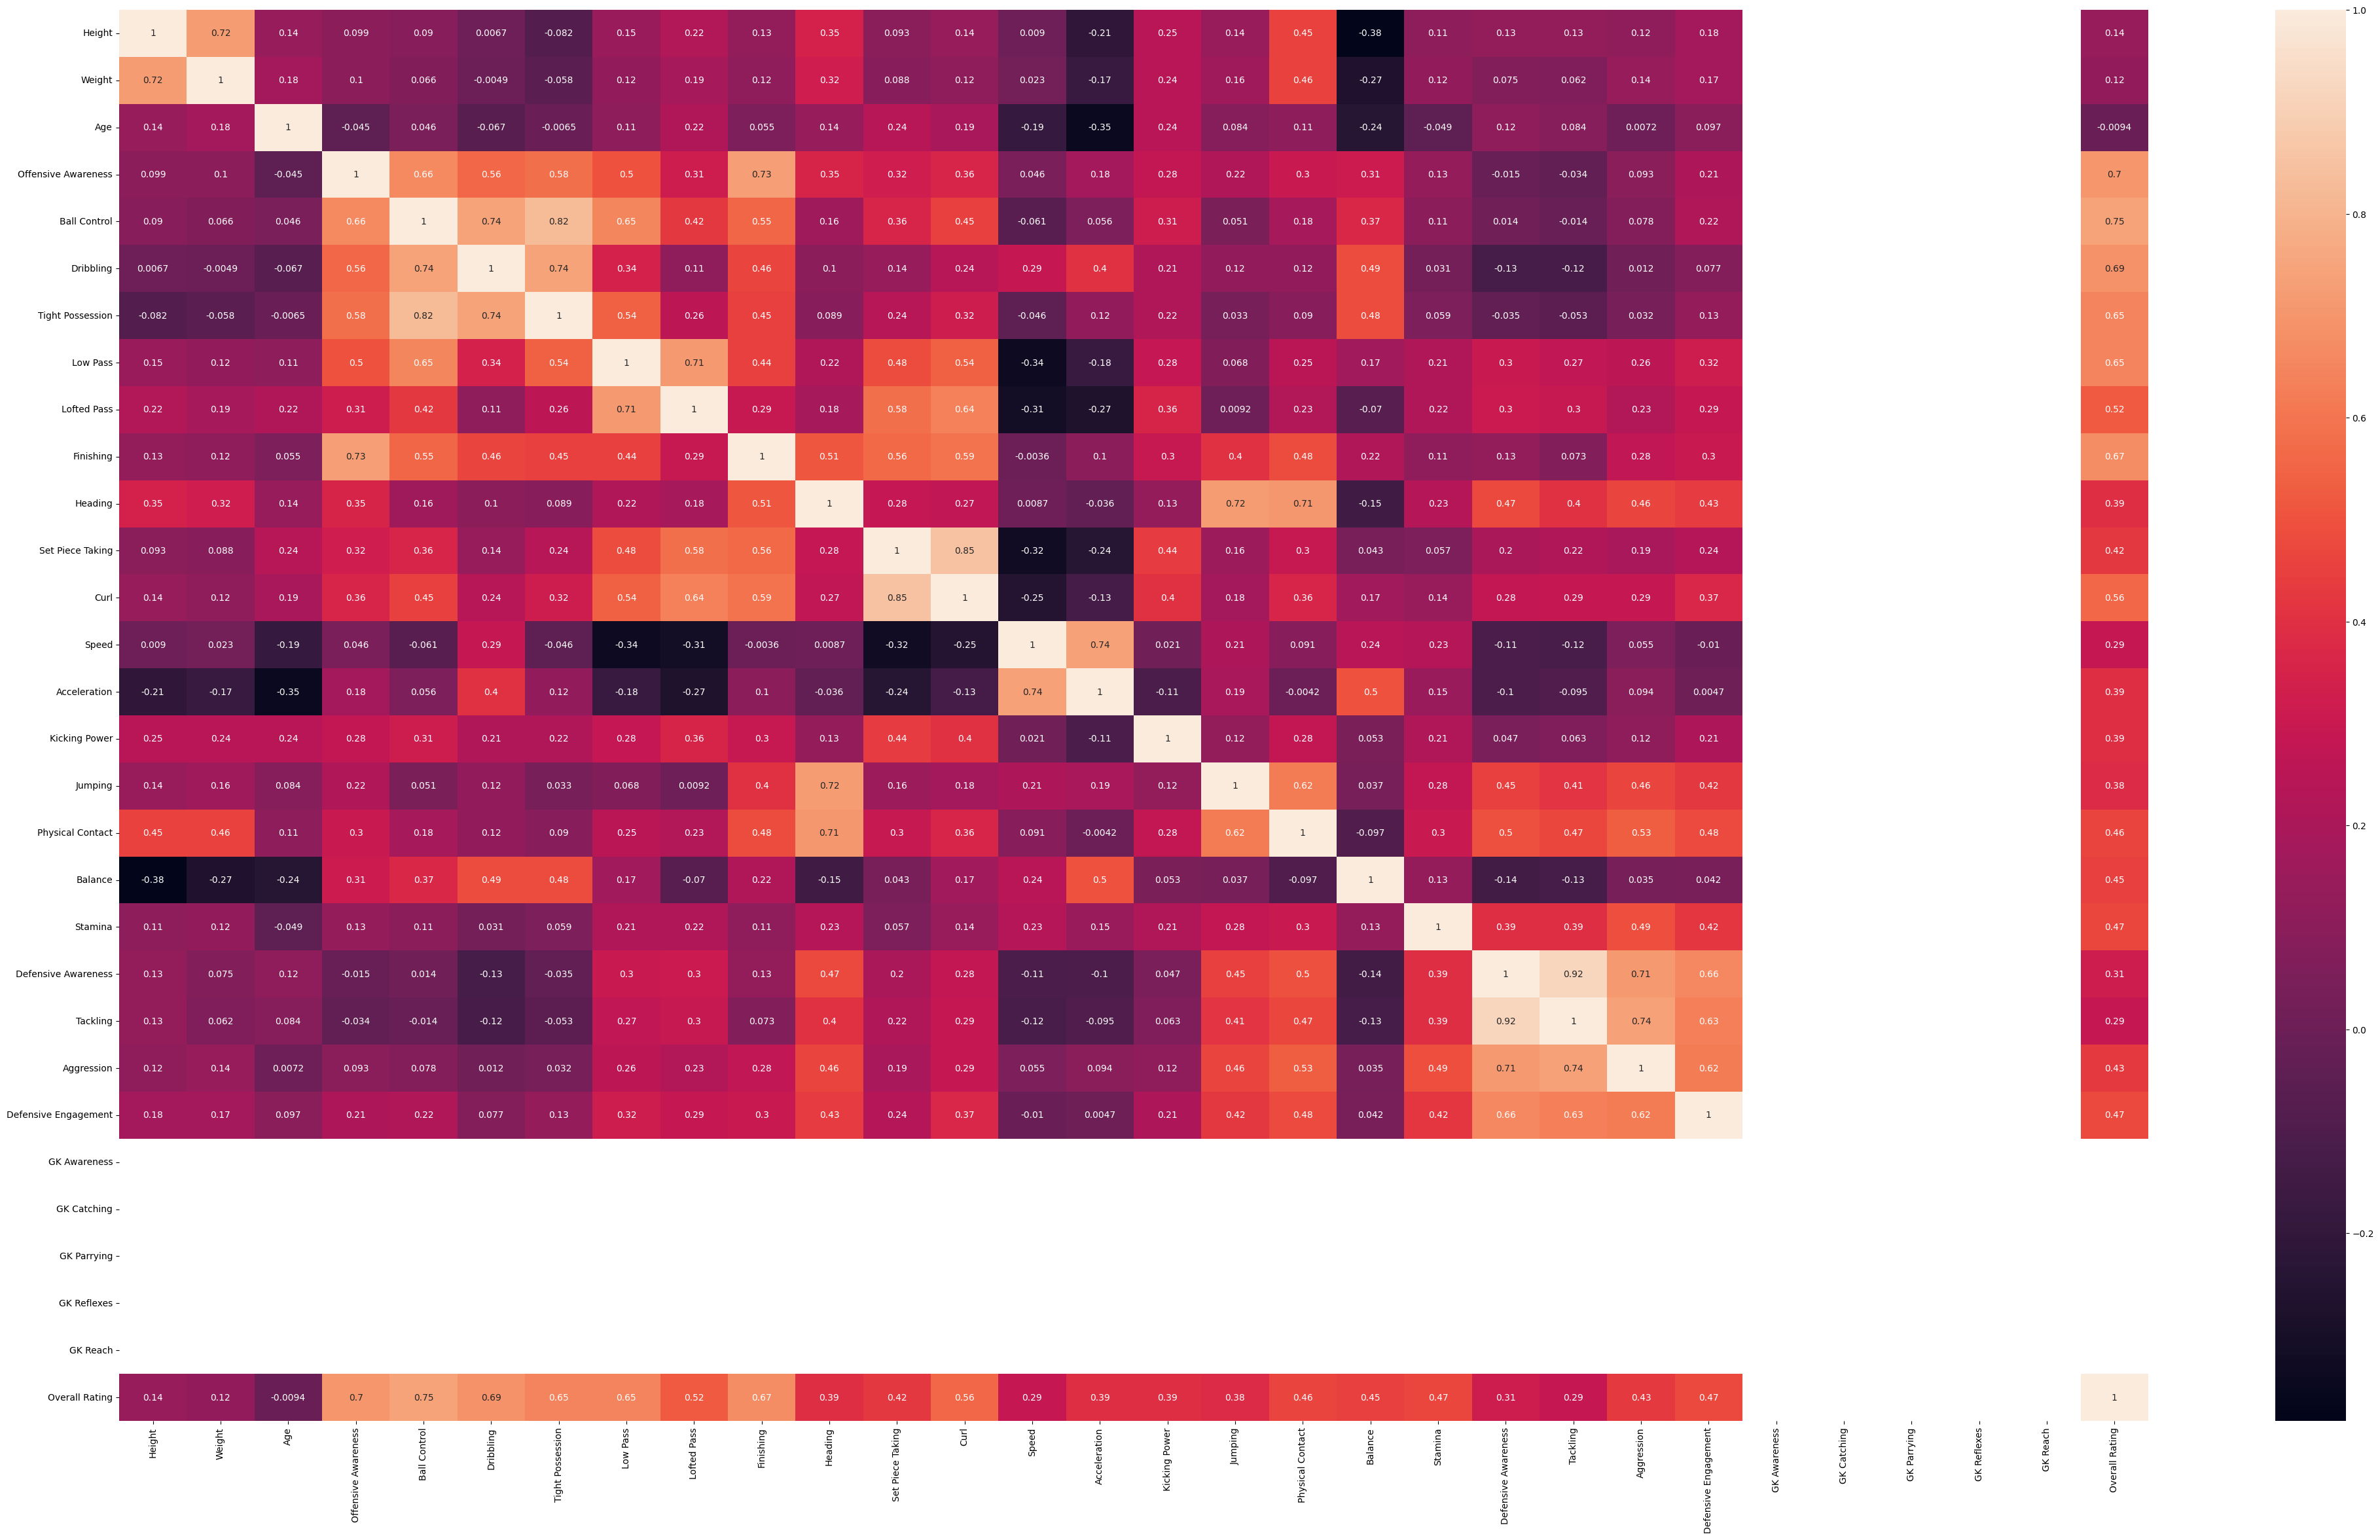

In [28]:
plt.figure(figsize=(50,28))
sns.heatmap(df.corr(), annot = True)

As we can see in the heatmap above overall rating is not correlated significantly with age, weight
and

In [29]:
df = df.drop(['Age','Weight'],axis = 1)

<Axes: xlabel='Speed', ylabel='Overall Rating'>

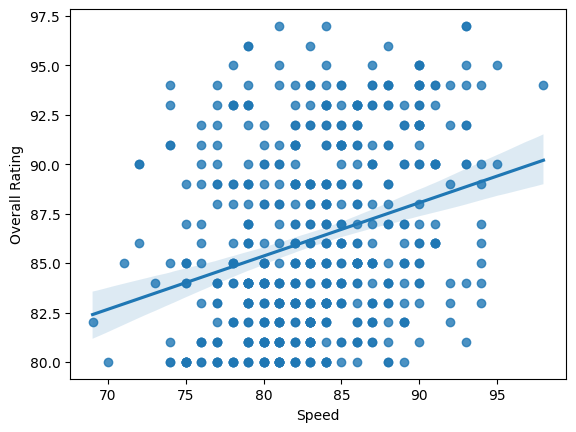

In [30]:
sns.regplot(data = df, x = 'Speed', y = 'Overall Rating')

<Axes: xlabel='Ball Control', ylabel='Overall Rating'>

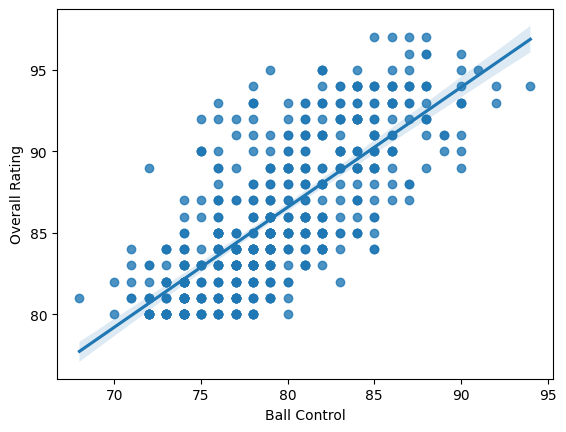

In [31]:
sns.regplot(data = df, x = 'Ball Control', y = 'Overall Rating')

<Axes: xlabel='Dribbling', ylabel='Overall Rating'>

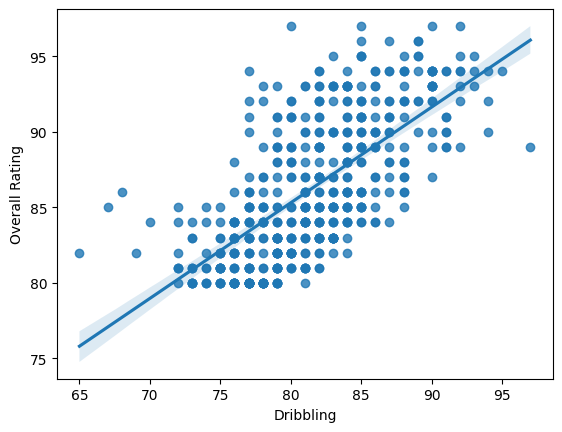

In [32]:
sns.regplot(data = df, x = 'Dribbling', y = 'Overall Rating')

Ball control, Dribbling looks key stats for a Wide Midfielder.

##Scaling And Train Test Split

In [33]:
X = df.drop('Overall Rating', axis =1) # Removing the feature we need to predict
y =df['Overall Rating']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train= scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_train.shape

(477, 27)

In [41]:
X_test.shape

(54, 27)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [43]:
model = Sequential()

model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [44]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=4,epochs=200)

Epoch 1/200
120/120 [==============================] - 2s 6ms/step - loss: 5766.3784 - val_loss: 790.3601
Epoch 2/200
120/120 [==============================] - 0s 4ms/step - loss: 159.5307 - val_loss: 98.6739
Epoch 3/200
120/120 [==============================] - 0s 3ms/step - loss: 94.5934 - val_loss: 109.5006
Epoch 4/200
120/120 [==============================] - 0s 4ms/step - loss: 80.3406 - val_loss: 72.2357
Epoch 5/200
120/120 [==============================] - 0s 4ms/step - loss: 65.1733 - val_loss: 58.0783
Epoch 6/200
120/120 [==============================] - 0s 4ms/step - loss: 53.8700 - val_loss: 49.9009
Epoch 7/200
120/120 [==============================] - 0s 3ms/step - loss: 44.4575 - val_loss: 41.9850
Epoch 8/200
120/120 [==============================] - 0s 2ms/step - loss: 36.9204 - val_loss: 42.2910
Epoch 9/200
120/120 [==============================] - 0s 2ms/step - loss: 31.3680 - val_loss: 34.6004
Epoch 10/200
120/120 [==============================] - 0s 2ms/step 

In [45]:
model.save('WMF_stats_predictor.h5')

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
X_test
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)